# 📊 01 - Data Exploration
## E-commerce Customer Behavior Analysis

**Tujuan Notebook:**
- Load dan eksplorasi dataset
- Analisis struktur dan tipe data
- Statistik deskriptif
- Visualisasi distribusi dan korelasi
- Insight awal perilaku pelanggan

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add src to path
sys.path.insert(0, os.path.abspath('../src'))
from preprocessing import load_data, get_data_info, check_missing_values

# Settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
sns.set_palette('husl')

# Create output directory
os.makedirs('../outputs/figures', exist_ok=True)

print('✅ Libraries imported successfully!')

Matplotlib is building the font cache; this may take a moment.


✅ Libraries imported successfully!


---
## 1. Load Dataset

In [2]:
# Load data
df = load_data('../data/raw/E-commerce Customer Behavior - Sheet1.csv')
df.head(10)

✅ Data loaded: 350 rows, 11 columns


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
5,106,Female,37,Houston,Bronze,440.80,8,3.1,False,22,Neutral
6,107,Female,31,New York,Gold,1150.60,15,4.5,True,28,Satisfied
7,108,Male,35,Los Angeles,Silver,800.90,12,4.2,False,14,Neutral
8,109,Female,41,Chicago,Bronze,495.25,10,3.6,True,40,Unsatisfied
9,110,Male,28,San Francisco,Gold,1520.10,21,4.8,False,9,Satisfied


---
## 2. Data Structure & Info

In [3]:
# Dataset shape
print(f"📏 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\n📋 Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

📏 Dataset Shape: 350 rows × 11 columns

📋 Column Names:
   1. Customer ID
   2. Gender
   3. Age
   4. City
   5. Membership Type
   6. Total Spend
   7. Items Purchased
   8. Average Rating
   9. Discount Applied
   10. Days Since Last Purchase
   11. Satisfaction Level


In [4]:
# Data types
print("🔍 Data Types:")
df.info()

🔍 Data Types:
<class 'pandas.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    str    
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    str    
 4   Membership Type           350 non-null    str    
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    str    
dtypes: bool(1), float64(2), int64(4), str(4)
memory usage: 27.8 KB


In [5]:
# Check missing values
missing_df = check_missing_values(df)
if missing_df.empty:
    print("✅ No missing values found!")
else:
    print("⚠️ Missing Values Detected:")
    display(missing_df)

⚠️ Missing Values Detected:


,column,missing_count,missing_percentage
10,Satisfaction Level,2,0.571429


---
## 3. Descriptive Statistics

In [6]:
# Numeric columns statistics
print("📈 Numeric Variables Statistics:")
df.describe().round(2)

📈 Numeric Variables Statistics:


,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.00,350.00,350.00,350.00,350.00,350.00
mean,275.50,33.60,845.38,12.60,4.02,26.59
std,101.18,4.87,362.06,4.16,0.58,13.44
min,101.00,26.00,410.80,7.00,3.00,9.00
25%,188.25,30.00,502.00,9.00,3.50,15.00
50%,275.50,32.50,775.20,12.00,4.10,23.00
75%,362.75,37.00,1160.60,15.00,4.50,38.00
max,450.00,43.00,1520.10,21.00,4.90,63.00


In [7]:
# Categorical columns statistics
print("📊 Categorical Variables:")
categorical_cols = ['Gender', 'City', 'Membership Type', 'Discount Applied', 'Satisfaction Level']

for col in categorical_cols:
    print(f"\n🔹 {col}:")
    value_counts = df[col].value_counts()
    for val, count in value_counts.items():
        pct = count / len(df) * 100
        print(f"   {val}: {count} ({pct:.1f}%)")

📊 Categorical Variables:

🔹 Gender:
   Female: 175 (50.0%)
   Male: 175 (50.0%)

🔹 City:
   New York: 59 (16.9%)
   Los Angeles: 59 (16.9%)
   Chicago: 58 (16.6%)
   San Francisco: 58 (16.6%)
   Miami: 58 (16.6%)
   Houston: 58 (16.6%)

🔹 Membership Type:
   Gold: 117 (33.4%)
   Silver: 117 (33.4%)
   Bronze: 116 (33.1%)

🔹 Discount Applied:
   True: 175 (50.0%)
   False: 175 (50.0%)

🔹 Satisfaction Level:
   Satisfied: 125 (35.7%)
   Unsatisfied: 116 (33.1%)
   Neutral: 107 (30.6%)


---
## 4. Distribution Visualizations

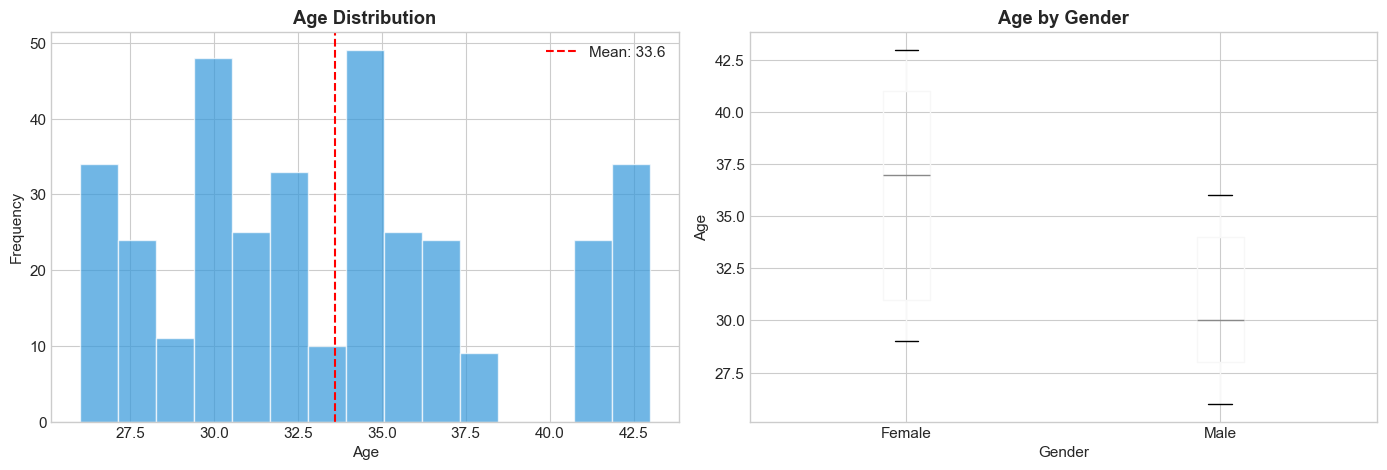

✅ Saved: 01_age_distribution.png


In [8]:
# Age Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Age'], bins=15, edgecolor='white', alpha=0.7, color='#3498db')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Age Distribution', fontweight='bold')
axes[0].axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Mean: {df["Age"].mean():.1f}')
axes[0].legend()

# Box plot by Gender
df.boxplot(column='Age', by='Gender', ax=axes[1])
axes[1].set_title('Age by Gender', fontweight='bold')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Age')
plt.suptitle('')

plt.tight_layout()
plt.savefig('../outputs/figures/01_age_distribution.png', dpi=150, bbox_inches='tight')
plt.show()
print('✅ Saved: 01_age_distribution.png')

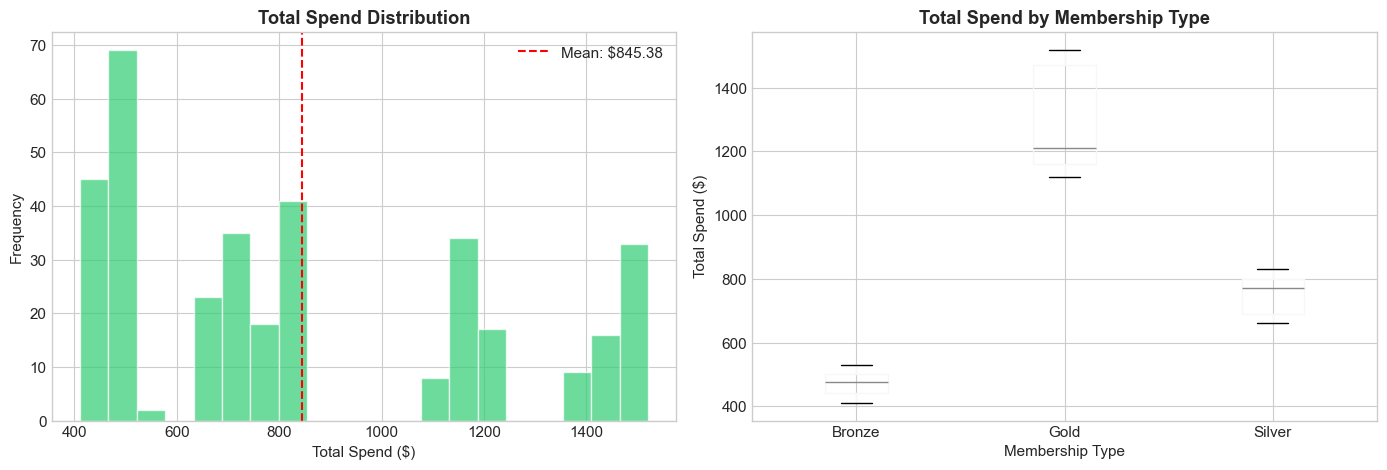

✅ Saved: 02_spend_distribution.png


In [9]:
# Total Spend Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Total Spend'], bins=20, edgecolor='white', alpha=0.7, color='#2ecc71')
axes[0].set_xlabel('Total Spend ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Total Spend Distribution', fontweight='bold')
axes[0].axvline(df['Total Spend'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Total Spend"].mean():.2f}')
axes[0].legend()

# Box plot by Membership
df.boxplot(column='Total Spend', by='Membership Type', ax=axes[1])
axes[1].set_title('Total Spend by Membership Type', fontweight='bold')
axes[1].set_xlabel('Membership Type')
axes[1].set_ylabel('Total Spend ($)')
plt.suptitle('')

plt.tight_layout()
plt.savefig('../outputs/figures/02_spend_distribution.png', dpi=150, bbox_inches='tight')
plt.show()
print('✅ Saved: 02_spend_distribution.png')

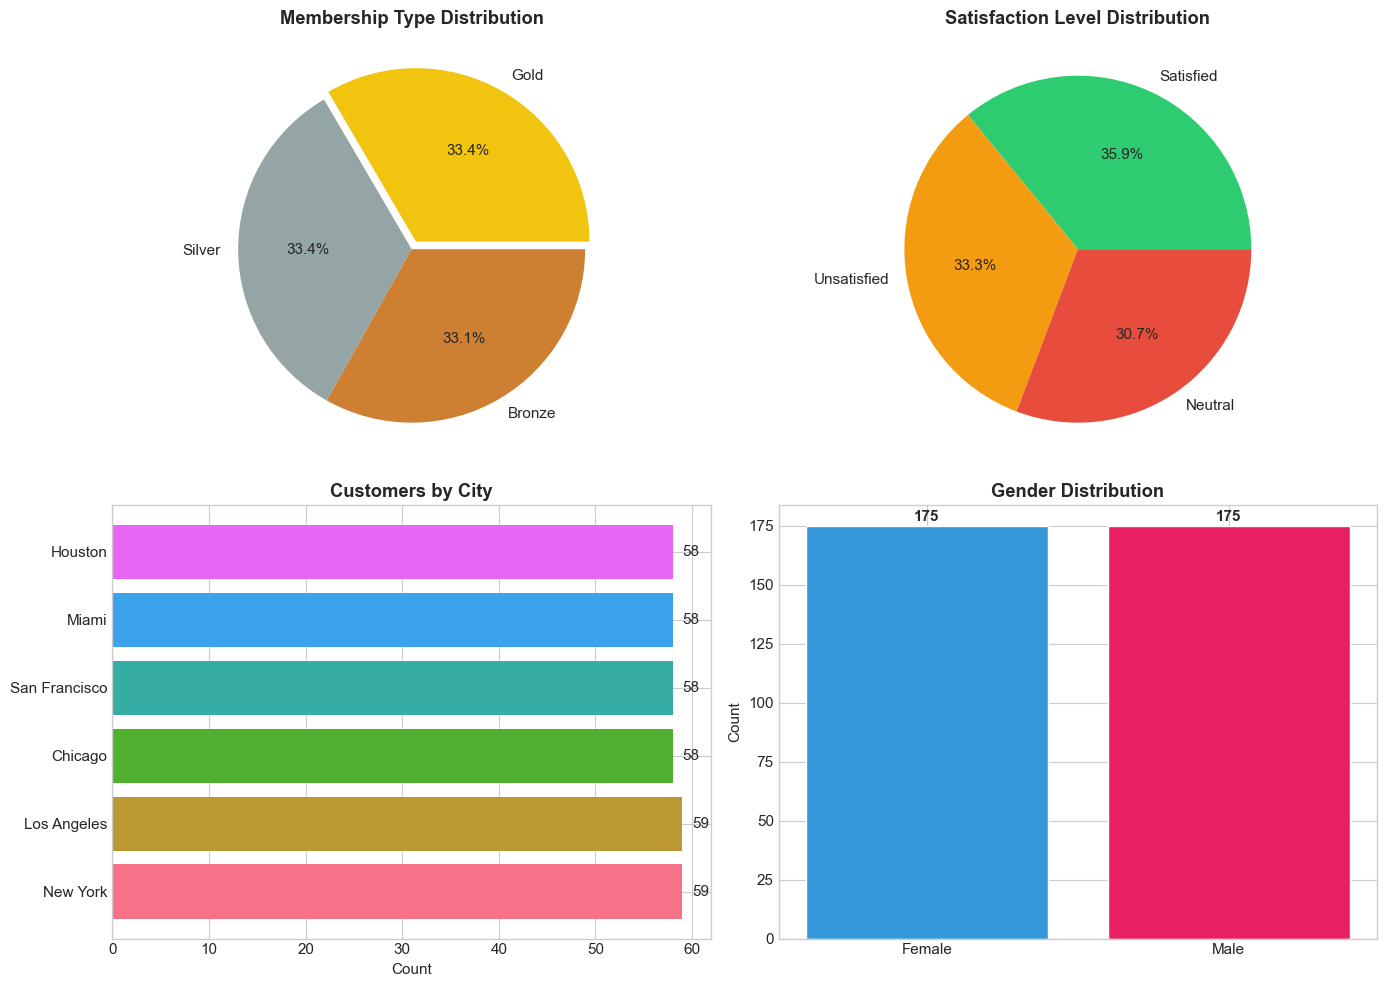

✅ Saved: 03_categorical_distributions.png


In [10]:
# Categorical Distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Membership Type
membership_counts = df['Membership Type'].value_counts()
colors = ['#f1c40f', '#95a5a6', '#cd7f32']
axes[0, 0].pie(membership_counts, labels=membership_counts.index, autopct='%1.1f%%', colors=colors, explode=[0.05, 0, 0])
axes[0, 0].set_title('Membership Type Distribution', fontweight='bold')

# Satisfaction Level
satisfaction_counts = df['Satisfaction Level'].value_counts()
colors_sat = ['#2ecc71', '#f39c12', '#e74c3c']
axes[0, 1].pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', colors=colors_sat)
axes[0, 1].set_title('Satisfaction Level Distribution', fontweight='bold')

# City Distribution
city_counts = df['City'].value_counts()
axes[1, 0].barh(city_counts.index, city_counts.values, color=sns.color_palette('husl', len(city_counts)))
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_title('Customers by City', fontweight='bold')
for i, v in enumerate(city_counts.values):
    axes[1, 0].text(v + 1, i, str(v), va='center')

# Gender Distribution
gender_counts = df['Gender'].value_counts()
axes[1, 1].bar(gender_counts.index, gender_counts.values, color=['#3498db', '#e91e63'], edgecolor='white')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Gender Distribution', fontweight='bold')
for i, v in enumerate(gender_counts.values):
    axes[1, 1].text(i, v + 2, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/03_categorical_distributions.png', dpi=150, bbox_inches='tight')
plt.show()
print('✅ Saved: 03_categorical_distributions.png')

---
## 5. Correlation Analysis

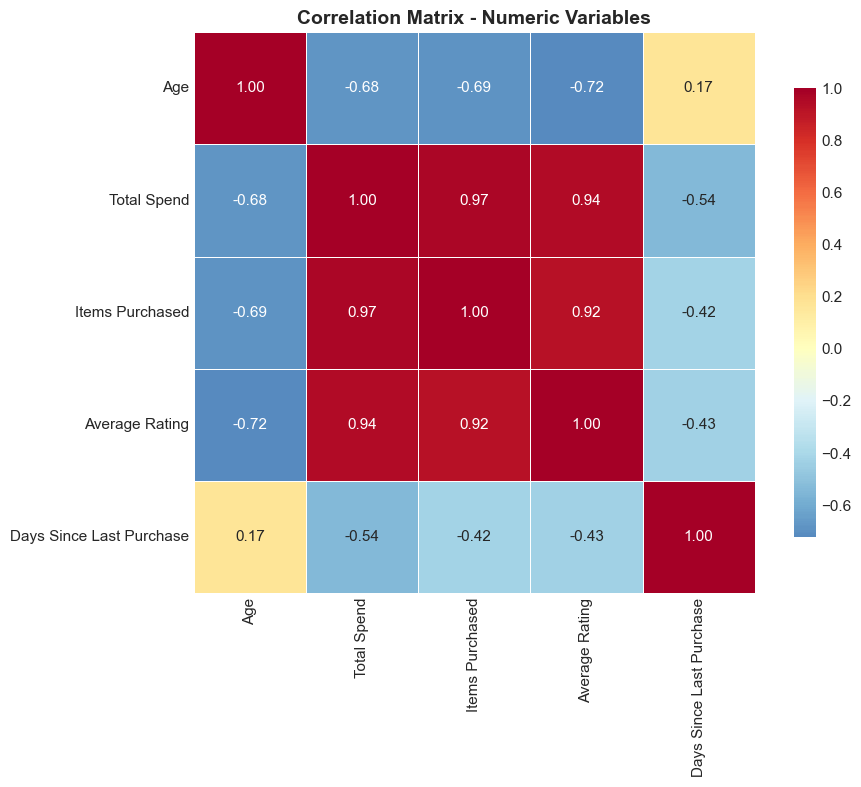

✅ Saved: 04_correlation_matrix.png


In [11]:
# Numeric columns correlation
numeric_cols = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, linewidths=0.5, fmt='.2f',
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix - Numeric Variables', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.savefig('../outputs/figures/04_correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()
print('✅ Saved: 04_correlation_matrix.png')

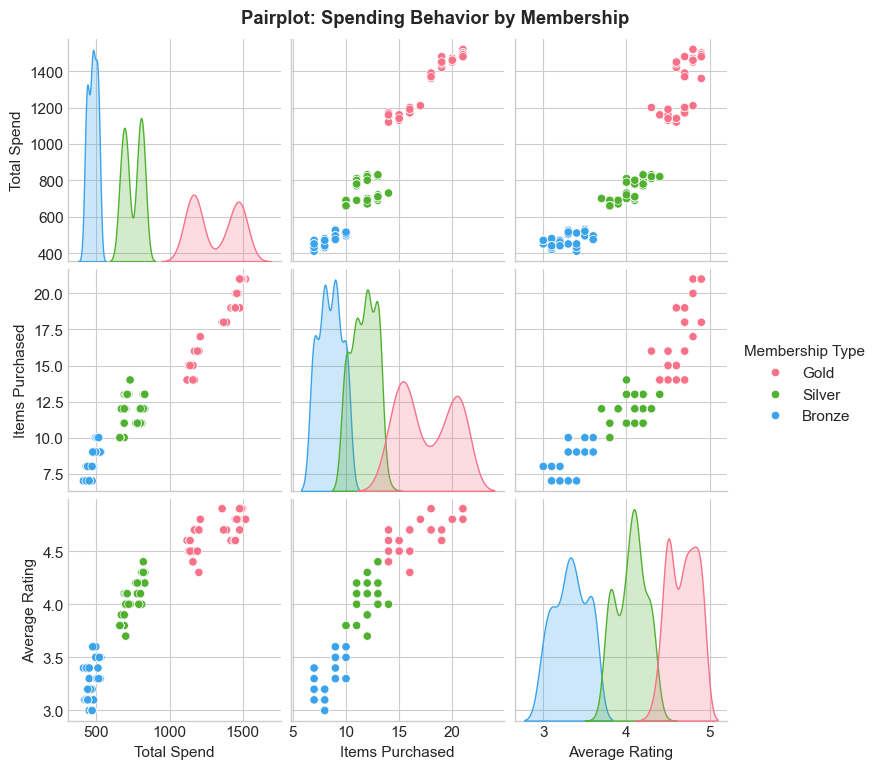

✅ Saved: 05_pairplot_membership.png


In [12]:
# Pairplot for key variables
key_cols = ['Total Spend', 'Items Purchased', 'Average Rating', 'Membership Type']
g = sns.pairplot(df[key_cols], hue='Membership Type', palette='husl', diag_kind='kde')
g.fig.suptitle('Pairplot: Spending Behavior by Membership', y=1.02, fontweight='bold')
plt.savefig('../outputs/figures/05_pairplot_membership.png', dpi=150, bbox_inches='tight')
plt.show()
print('✅ Saved: 05_pairplot_membership.png')

---
## 6. Business Insights Analysis

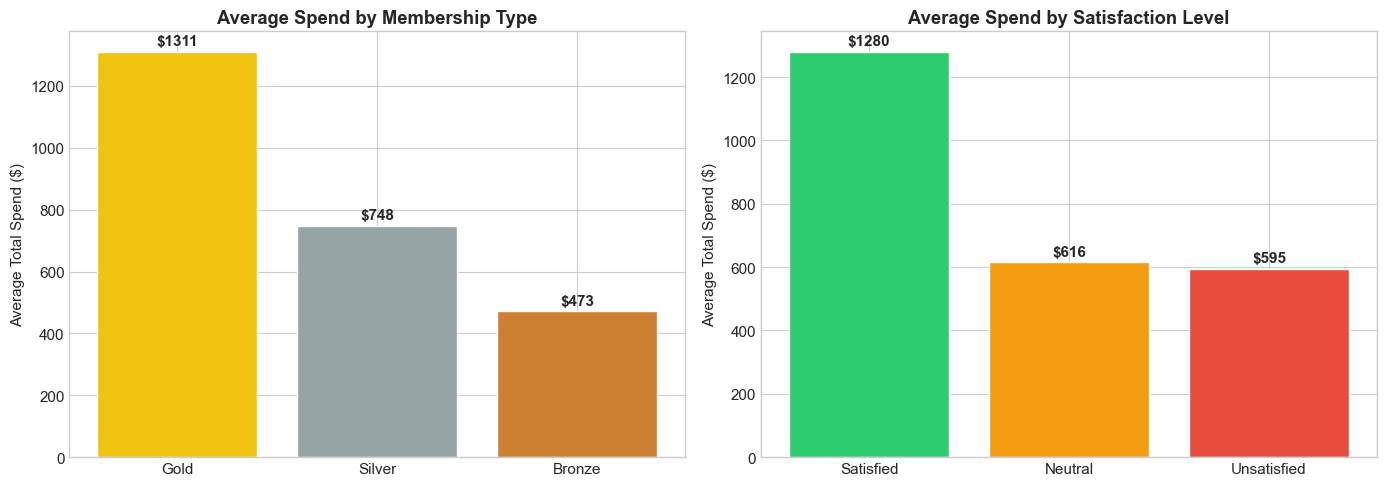

✅ Saved: 06_spend_by_segments.png


In [13]:
# Spending by Membership and Satisfaction
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Spend by Membership
membership_spend = df.groupby('Membership Type')['Total Spend'].mean().sort_values(ascending=False)
bars1 = axes[0].bar(membership_spend.index, membership_spend.values, 
                     color=['#f1c40f', '#95a5a6', '#cd7f32'], edgecolor='white')
axes[0].set_ylabel('Average Total Spend ($)')
axes[0].set_title('Average Spend by Membership Type', fontweight='bold')
for bar in bars1:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
                 f'${bar.get_height():.0f}', ha='center', fontweight='bold')

# Spend by Satisfaction
satisfaction_spend = df.groupby('Satisfaction Level')['Total Spend'].mean().reindex(['Satisfied', 'Neutral', 'Unsatisfied'])
bars2 = axes[1].bar(satisfaction_spend.index, satisfaction_spend.values,
                     color=['#2ecc71', '#f39c12', '#e74c3c'], edgecolor='white')
axes[1].set_ylabel('Average Total Spend ($)')
axes[1].set_title('Average Spend by Satisfaction Level', fontweight='bold')
for bar in bars2:
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
                 f'${bar.get_height():.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/06_spend_by_segments.png', dpi=150, bbox_inches='tight')
plt.show()
print('✅ Saved: 06_spend_by_segments.png')

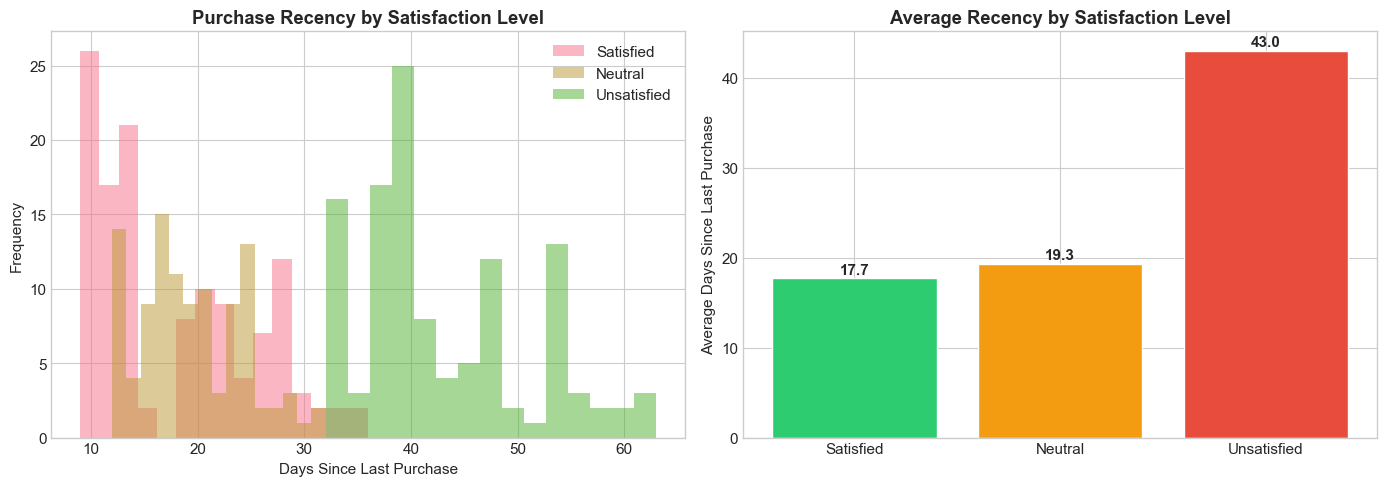

✅ Saved: 07_recency_satisfaction.png


In [14]:
# Recency vs Satisfaction Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Days since purchase distribution by Satisfaction
for level in ['Satisfied', 'Neutral', 'Unsatisfied']:
    subset = df[df['Satisfaction Level'] == level]['Days Since Last Purchase']
    axes[0].hist(subset, bins=15, alpha=0.5, label=level)
axes[0].set_xlabel('Days Since Last Purchase')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Purchase Recency by Satisfaction Level', fontweight='bold')
axes[0].legend()

# Average Recency by Satisfaction
recency_by_sat = df.groupby('Satisfaction Level')['Days Since Last Purchase'].mean().reindex(['Satisfied', 'Neutral', 'Unsatisfied'])
bars = axes[1].bar(recency_by_sat.index, recency_by_sat.values,
                    color=['#2ecc71', '#f39c12', '#e74c3c'], edgecolor='white')
axes[1].set_ylabel('Average Days Since Last Purchase')
axes[1].set_title('Average Recency by Satisfaction Level', fontweight='bold')
for bar in bars:
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                 f'{bar.get_height():.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/07_recency_satisfaction.png', dpi=150, bbox_inches='tight')
plt.show()
print('✅ Saved: 07_recency_satisfaction.png')

---
## 7. Key Insights Summary

In [15]:
# Generate Key Insights
print("=" * 60)
print("📊 KEY INSIGHTS FROM DATA EXPLORATION")
print("=" * 60)

print("\n🔹 DATASET OVERVIEW:")
print(f"   • Total Customers: {len(df)}")
print(f"   • Total Revenue: ${df['Total Spend'].sum():,.2f}")
print(f"   • Average Spend: ${df['Total Spend'].mean():,.2f}")

print("\n🔹 MEMBERSHIP ANALYSIS:")
for mem in ['Gold', 'Silver', 'Bronze']:
    subset = df[df['Membership Type'] == mem]
    print(f"   • {mem}: {len(subset)} customers, Avg Spend: ${subset['Total Spend'].mean():,.2f}")

print("\n🔹 SATISFACTION DISTRIBUTION:")
for sat in ['Satisfied', 'Neutral', 'Unsatisfied']:
    count = len(df[df['Satisfaction Level'] == sat])
    pct = count / len(df) * 100
    print(f"   • {sat}: {count} ({pct:.1f}%)")

print("\n🔹 CORRELATION INSIGHTS:")
print(f"   • Total Spend ↔ Items Purchased: {correlation_matrix.loc['Total Spend', 'Items Purchased']:.3f} (strong positive)")
print(f"   • Total Spend ↔ Average Rating: {correlation_matrix.loc['Total Spend', 'Average Rating']:.3f} (positive)")

print("\n🔹 RISK INDICATORS:")
inactive = df[df['Days Since Last Purchase'] > 40]
unsatisfied = df[df['Satisfaction Level'] == 'Unsatisfied']
print(f"   • Inactive Customers (>40 days): {len(inactive)} ({len(inactive)/len(df)*100:.1f}%)")
print(f"   • Unsatisfied Customers: {len(unsatisfied)} ({len(unsatisfied)/len(df)*100:.1f}%)")

print("\n" + "=" * 60)
print("✅ Data Exploration Complete!")
print("   Next: 02_data_preprocessing.ipynb")
print("=" * 60)

📊 KEY INSIGHTS FROM DATA EXPLORATION

🔹 DATASET OVERVIEW:
   • Total Customers: 350
   • Total Revenue: $295,883.60
   • Average Spend: $845.38

🔹 MEMBERSHIP ANALYSIS:
   • Gold: 117 customers, Avg Spend: $1,311.14
   • Silver: 117 customers, Avg Spend: $748.43
   • Bronze: 116 customers, Avg Spend: $473.39

🔹 SATISFACTION DISTRIBUTION:
   • Satisfied: 125 (35.7%)
   • Neutral: 107 (30.6%)
   • Unsatisfied: 116 (33.1%)

🔹 CORRELATION INSIGHTS:
   • Total Spend ↔ Items Purchased: 0.972 (strong positive)
   • Total Spend ↔ Average Rating: 0.941 (positive)

🔹 RISK INDICATORS:
   • Inactive Customers (>40 days): 55 (15.7%)
   • Unsatisfied Customers: 116 (33.1%)

✅ Data Exploration Complete!
   Next: 02_data_preprocessing.ipynb
